In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import os

In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_url

'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [ ]:
data_dir=tf.keras.utils.get_file(origin=dataset_url,fname='flower_photos',untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

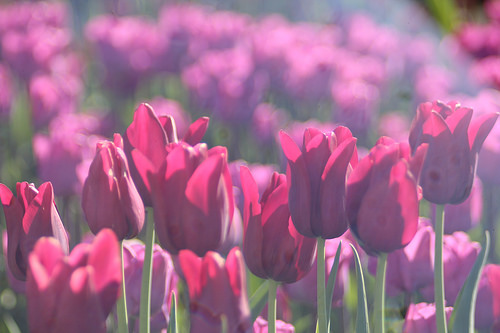

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

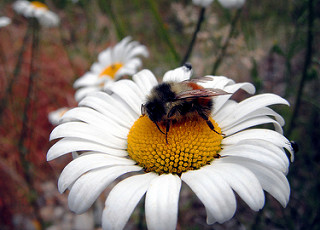

In [ ]:
daisy=list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

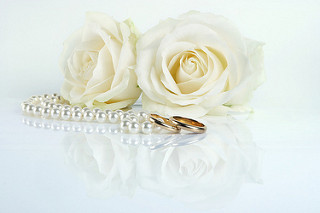

In [ ]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
batch_size=32
img_height=250
img_width=250

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            image_size=(img_height,img_width),
                                                            batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            image_size=(img_height,img_width),
                                                            batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
class_names=train_ds.class_names

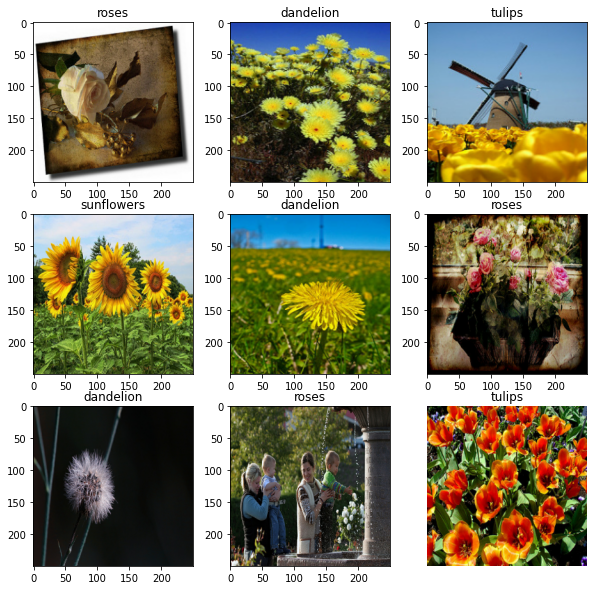

In [ ]:
plt.figure(figsize=(10,10))
for images, lables in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[lables[i]])
    plt.axis('off')

In [ ]:
for images_batch, labels_batch in train_ds:
  print(images_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32,)


In [ ]:
# Data Normalization in Tensorflow

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))
images_batch, labels_batch = next(iter(normalized_ds))

In [ ]:
first_image = images_batch[0]

In [ ]:
np.min(first_image), np.max(first_image)

(0.0, 0.9639371)